<div class="alert block alert-info alert">

# <center> Scientific Programming in Python

## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> Data Visualization using matplotlib<br>Understanding and interpreting data through visualization<br>(e.g., seeing patterns, outliers, developing a "feel" for the data)

**Source**: https://matplotlib.org
<br><br>


A highly popular plotting library 

- Examples with code: https://matplotlib.org/stable/gallery/index.html


**Exports Images** (e.g. graphs): pdf, svg, ps, eps, jpg, png, bmp, gif


### For citing matplotlib:

Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. IEEE Annals of the History of Computing, 9(03), pp.90-95.
<br><br>    
    
**Bibtex file**:

@Article{Hunter:2007,

  Author    = {Hunter, J. D.},

  Title     = {Matplotlib: A 2D graphics environment},

  Journal   = {Computing In Science \& Engineering},

  Volume    = {9},

  Number    = {3},

  Pages     = {90--95},

  abstract  = {Matplotlib is a 2D graphics package used for Python for application development, interactive scripting, and publication-quality image generation across user interfaces and operating systems.},

  publisher = {IEEE COMPUTER SOC},

  doi       = {10.1109/MCSE.2007.55},

  year      = 2007

}

### Helpful documents
- https://github.com/matplotlib/cheatsheets

<hr style="border:2px solid gray"></hr>

**Note**: All user-defined functions shown within the notebook do not include document strings (i.e., block comments) or internal checks. This is purposely done to focus on the teaching aspects of the lecture. **A full and proper user-defined function would include these.**

In [1]:
## For extra information given within the lectures

from IPython.display import HTML


def set_code_background(color: str):
    ''' Set the background color for code cells.

        Source: psychemedia via https://stackoverflow.com/questions/49429585/
                how-to-change-the-background-color-of-a-single-cell-in-a-jupyter-notebook-jupy

        To match Jupyter's dev class colors:
            "alert alert-block alert-warning" = #fcf8e3

        Args:
            color: HTML color, rgba, hex
    '''

    script = ("var cell = this.closest('.code_cell');"
              "var editor = cell.querySelector('.input_area');"
              f"editor.style.background='{color}';"
              "this.parentNode.removeChild(this)")
    display(HTML(f'<img src onerror="{script}">'))


set_code_background(color='#fcf8e3')

In [2]:
## Jupyter notebook - allows plot interactions
#%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

print(matplotlib.__version__)
print(np.__version__)

3.10.1
2.2.3


In [ ]:
## uncomment the following to test the help function
#help(plt.plot)

## Line Plots

The **`pyplot.plot`** function

`matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)`


- `pyplot`: https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot
- `plot`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
    - display <font color='DodgerBlue'>x, y</font> data using <font color='DodgerBlue'>lines and markers</font>

1. The <font color='DodgerBlue'>order of the x, y data is important</font> - allowing you to connect them with a line in a **reasonably interpretable manner**
    - Good for sequential data (e.g., time, distance)


3. Input data - two options:
    - y data alone (x defaults to an index array), or 
    - x, y data combination

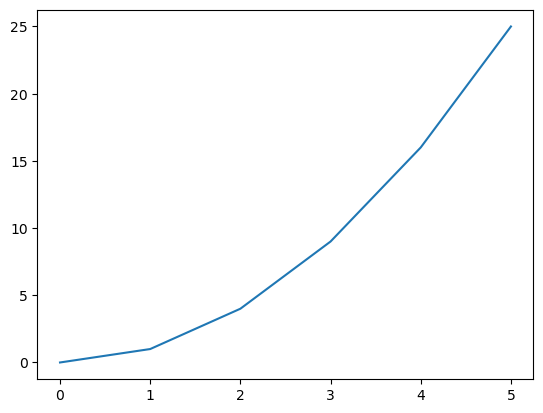

In [3]:
y_data = [0, 1, 4, 9, 16, 25]

plt.plot(y_data)
plt.show()

Notice that I am **not** passing the **y_data** using a **variable name** (e.g., `y=y_data`).

#### Title, Axis Labels, Tick Labels and Fontsize

Let's add some additional information to the figure.

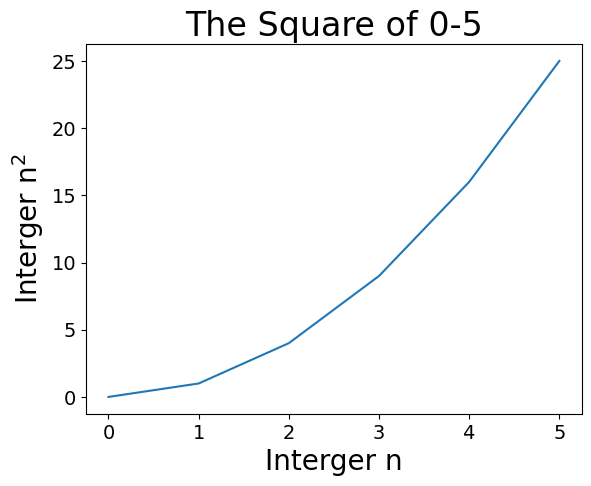

In [4]:
plt.plot(y_data)

plt.title('The Square of 0-5', fontsize=24)

plt.xlabel('Interger n', fontsize=20)
plt.ylabel('Interger n$^2$', fontsize=20)

plt.tick_params(axis='both', labelsize=14)

plt.show()

#### Legend and Grids

- `legend`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    - `loc`: `center`, `upper left`, `upper right`, `lower left`, `lower right`, `upper center`, `lower center`, `center left`, `center right` or `best` (default)
    - `fontsize`: `xx-small`, `'x-small`, `small`, `medium`, `large`, `x-large` or `xx-large`

<br>

- `grid`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    - `visible`: `True` or `False`
    - `which`: `major`, `minor` or `both`
    - `axis`: `x`, `y` or`both`

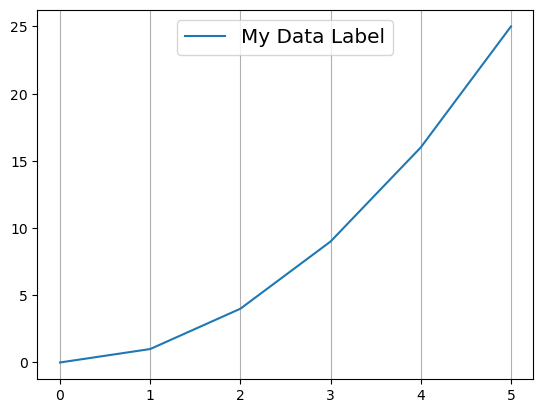

In [5]:
plt.plot(y_data, label='My Data Label')

plt.legend(loc='upper center', fontsize='x-large')

plt.grid(visible=True, which='major', axis='x')

plt.show()

#### Line and Marker Styles

- `linestyle`: `‘solid’` (default), `‘dashed’`, `‘dashdot’`, `‘dotted’`

- `marker`: more on this later

- `markersize`

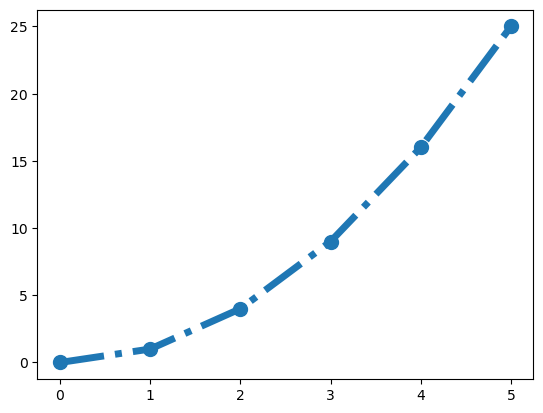

In [7]:
plt.plot(y_data,
         linestyle='dashdot', linewidth=2, 
         marker='o', markersize=10)
plt.show()

<hr style="border:2px solid gray"></hr>

##### Sidenote: Mathematics within the matplotlib library
- NumPy vs. regular lists: a reminder of vectorized calculations

**NumPy**

In [ ]:
numpy_data = np.arange(0, 6, 1)
numpy_data

This allows us to do mathematics over the entire array easily:

In [ ]:
plt.figure()

plt.plot(numpy_data**2)
plt.show()

NumPy makes this easy to do within matplotlib.

**Regular Lists**

Now, let's show how one might do this using Regular Lists and the built-in function range:

In [ ]:
range_data = range(0, 6, 1)

plt.plot(range_data**2)
plt.show() 

As seen, this **math does not work using a list** with the plot function, so the solution is to create

1. a loop

2. a lambda function (with map: https://docs.python.org/3/library/functions.html#map)

3. use a list comprehension

In [ ]:
squared_values = []

## 1. a loop
# for value in range_data:
#     squared_values.append(value**2)

## 2. a lambda function with map
# squared_values = list(map(lambda x: x**2, range_data))

## 3. List comprehension
squared_values = [x**2 for x in range_data]

plt.plot(squared_values)
plt.show()

<hr style="border:2px solid gray"></hr>

## Scatter Plots

`matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

1. Data plotted using **markers only** (i.e., <font color='DodgerBlue'>the data will not connected using a line</font>)

2. Need both **x, y** data points

3. Good for data that **isn't sequential**

4. Can color-code regions on the plot


Let's create some **randomly distributed data** that is a sampling between **0** and **1000**, with **200** total **data points**.

In [8]:
x_values = range(0, 1000, 5)  # 1000/200 = 5 step size

y_values = random.sample(range(0, 1000, 1), 200)

**Note**
- `s` is the pointsize (recall that for `line` plots, the size was specirfied using `markersize`)

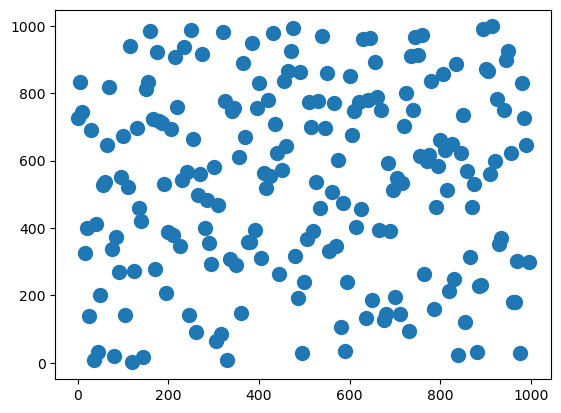

In [9]:
plt.scatter(x_values, y_values, s=100)
plt.show()

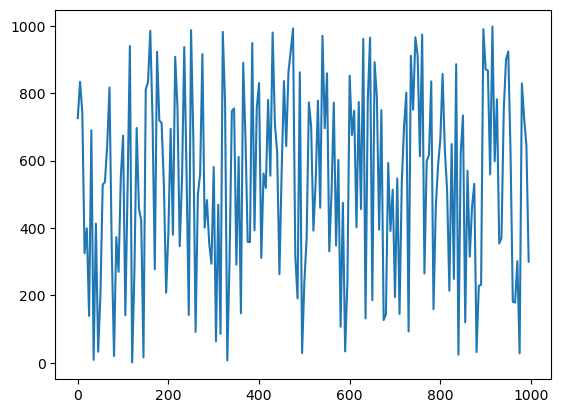

In [10]:
plt.plot(x_values, y_values)
plt.show()

## Marker Style and Color Control

### Color

https://matplotlib.org/stable/tutorials/colors/colors.html

#### Specification:
1. RGB / RGBA (alpha = transparency - a.k.a. opacity): e.g., `[0.6, 0.2, 0.2, 0.3]`

2. Hex RGB / RGBA: e.g., `#9467bd`

3. Single character (shorthand):
    - `b` as blue
    - `g` as green
    - `r` as red
    - `c` as cyan
    - `m` as magenta
    - `y` as yellow
    - `k` as black
    - `w` as white

4. Case-insensitive X11/CSS4 color (name without spaces): e.g., `red`, `aquamarine`, `'mediumseagreen'`, `'darkseagreen'`

5. "CN" color, where N is an integer: eg., `C5`

**Example**: using the different color specifications

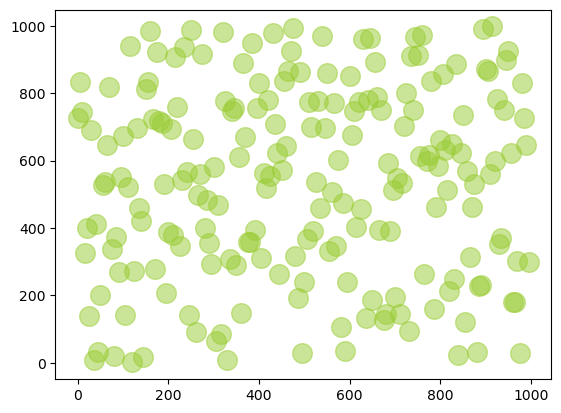

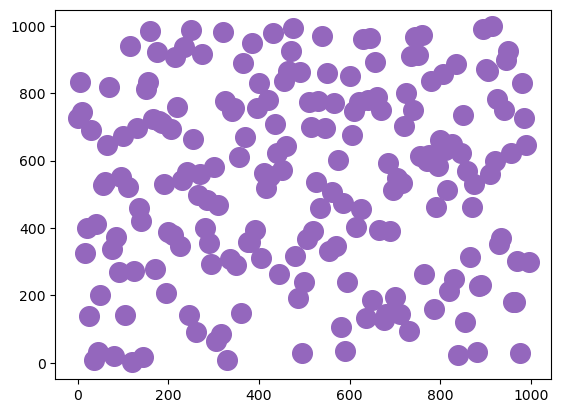

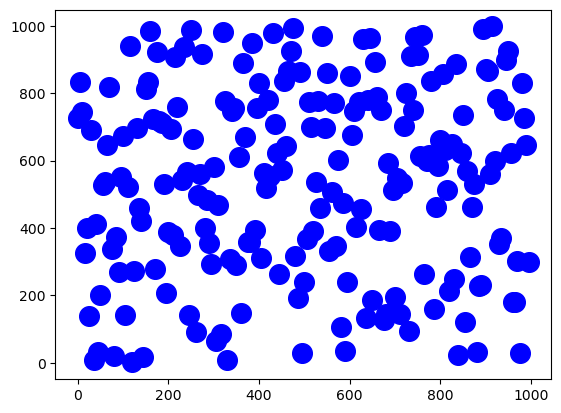

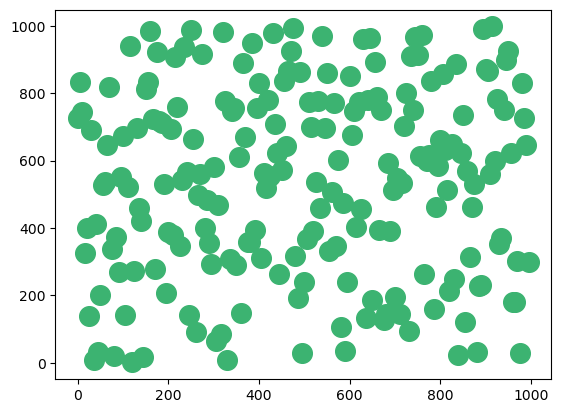

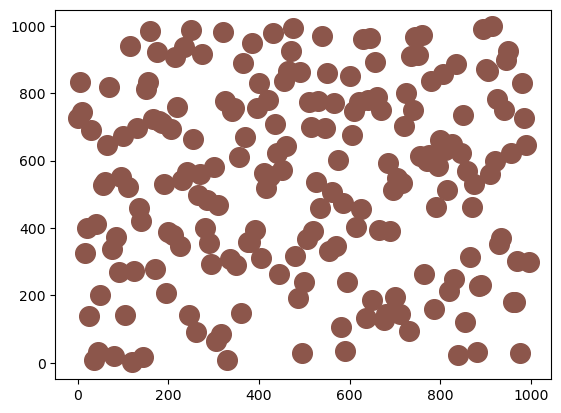

In [11]:
# RGBA, Hex RGB, Single Character, CN specification
color_list = [[0.6, 0.8, 0.2, 0.5], '#9467bd', 'b', 'mediumseagreen', 'C5']

for color in color_list:
    plt.scatter(x_values, y_values, facecolor=color, s=200)
    plt.show()

### Maker Style

#### Shape (`marker=None`)

- Basic: https://matplotlib.org/stable/api/markers_api.html

Examples:
- `marker="o"` - circle (default)
- `marker="h"` - hexagon1

#### Additional color control
1. `facecolor=None`
2. `edgecolor=None`
3. `linewidth=None` - of the shape's edge
4. `alpha=None` - facecolor and edgecolor transparency

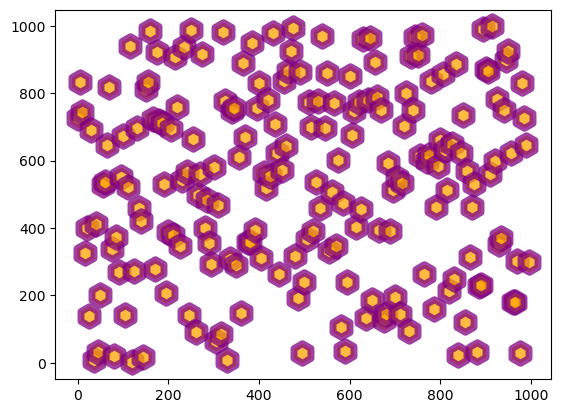

In [14]:
plt.scatter(x_values, y_values,
            marker='h', s=200, linewidth=5,
            facecolor='orange', edgecolor='purple',
            alpha=0.75)
plt.show()

####  Colormaps (cmap)

- a preset collection of color combinations
- certain **color combinations** have **advantages** for viewing *certain types* of **data**


#####  <font color='DodgerBlue'>Colormaps categories</font>

Good scientific practice for presenting data: you must **think** about how the data is behaving.

- **Sequential**: data has some **consecutive/continuous ordering** to it (e.g., temperature)
- **Diverging**: data's **middle value** is **important** (e.g., deviation around 0, or a mean)
- **Cyclic**: data's **endpoint(s) wrap around** (e.g., circular data...time of day, seasons)
- **Qualitative**: data that **lacks ordering or relationships** (e.g., random events)


- **Examples**: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<br>

<b>Parameters</b>
Parameters needed (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html):
- `c` is the marker color - what the color is dependent upon 
- `cmap` is the colormap

Usage examples - the data is mapped using different built-in color schemes based on the y-value:

- `c=y_value, cmap=plt.cm.prism`
- `c=y_value, cmap=plt.cm.rainbow`
- `c=y_value, cmap=plt.cm.PuRd`

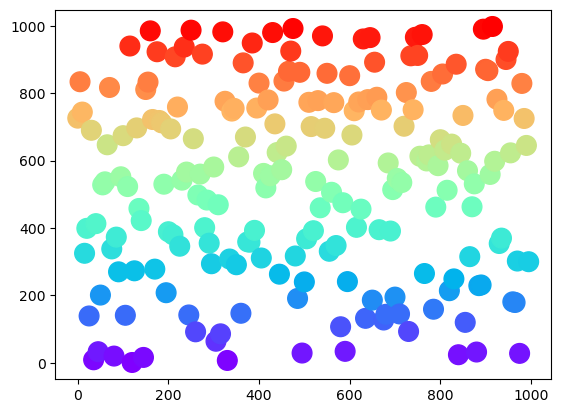

In [16]:
plt.scatter(x_values, y_values, c=y_values, cmap=plt.cm.rainbow, s=200)
plt.show()

## Ticklabels and Format

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html

`Axes.ticklabel_format(*, axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=None)`

Control tick labels using scientific notation
- `axis`: `x`, `y` or `both`
- `style='scientific'` - `scientific` or `plain`

- `scilimits=(m, n)` - how to use the **scientific notation**
    - Range is defined as a tuple, `(m, n)`: the exponent (i.e., $\mathbf{10^m}$ to $\mathbf{10^n}$)
        - **`m`**: **lower limit**
        - **`n`**: **upper limit**
    - **default** `(-5, 6)`: use scientific notation on numbers <font color='DodgerBlue'>**outside**</font> of $\mathbf{10^{-5}} \text{ to } \mathbf{10^{6}}$ (i.e., **0.00001 - 1,000,000**).

    - `(0, 0)`: <font color='DodgerBlue'>**unique**</font> tuple value - <font color='DodgerBlue'>**always use scientific notation**</font> for the axis tick labels.
    - **Example**: `(0, 3)` specifies scientific notation usage **outside** of $\mathbf{10^{0}} \text{ to } \mathbf{10^{3}}$ (i.e., **1 - 1000**).
        - (Due to the example data ranging from 0-995, this results in the same as `(-5, 6)`.)

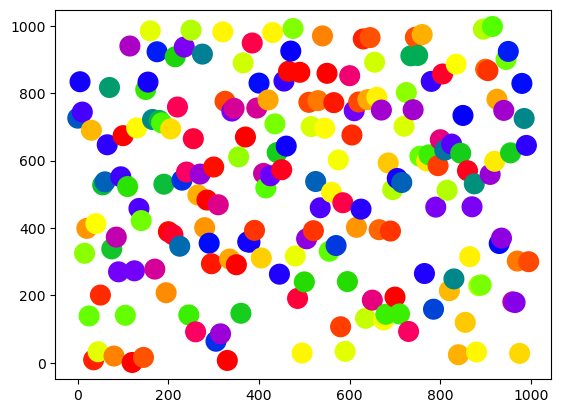

In [19]:
plt.scatter(x_values, y_values, c=y_values, cmap=plt.cm.prism, s=200)

plt.ticklabel_format(axis='x', style='scientific', scilimits=(-5, 6)) # scilimits=(-5, 6) or (0, 3)

plt.show()

## Output File Format and Resolution

Formats: png, pdf, ps, eps and svg

Recommended formats: **svg** and **pdf** (don't need to worry about setting the resolution than using DPI).

A **png** formatted file is also a good option. The **"dots-per-inch" (dpi)** is important for this. For print material, you need a minimum of **300 dpi**.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    - figure size (`figsize=[wdith, height]` are in inches) (default: [6.4, 4.8])
    - dots-per-inch" (`dpi`) (default: 100.0)
        - low: 72 dpi (i.e., web)
        - standard: 300 dpi (i.e., printing - thesis, brochures)
        - high: 600 dpi (i.e., exhibition-quality art)
<br>

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
    - save figure (`savefig`)
    - bounding box tight trimming (`bbox_inches='tight'`)
    - output format: 'png', 'pdf', 'svg', etc.

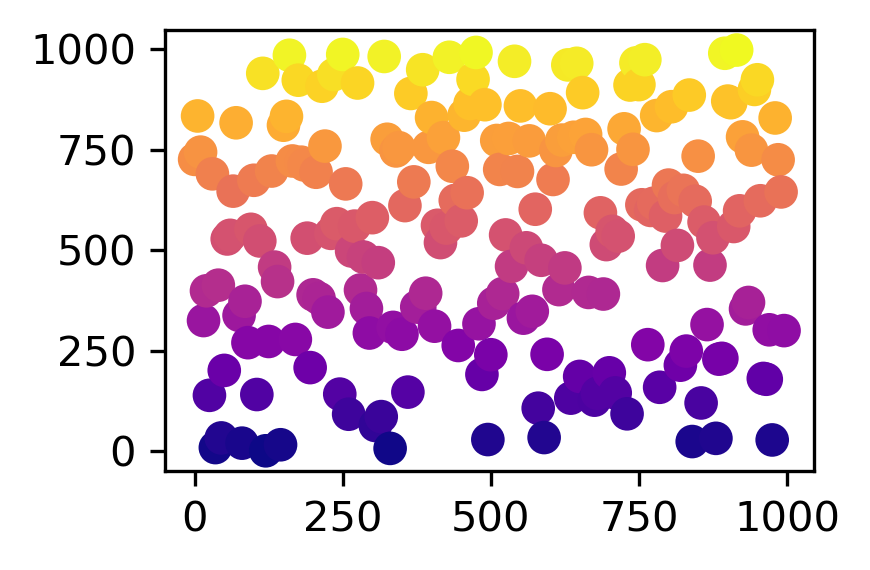

In [20]:
plt.figure(figsize=[3.0, 2.0], dpi=300, layout='tight')

plt.scatter(x_values, y_values, c=y_values, cmap=plt.cm.plasma, s=50)

plt.savefig('squares.pdf', bbox_inches='tight')

plt.show()

<hr style="border:2px solid gray"></hr>

## Overlay Multiple Data Sets

- Write two consecutive `plt` statements

Let's create a new data set for fun
- human versus alien signals using NumPy's trigonometry functions

In [21]:
x_data = np.arange(0.0, 1.0, 0.01)

y_data_human = 1 + np.sin(2 * np.pi * x_data)
y_data_alien = 1 + np.cos(2 * np.pi * x_data)

The **human** signal (given **first**) will be **overlapped** by the **alien** signal (given **second**):

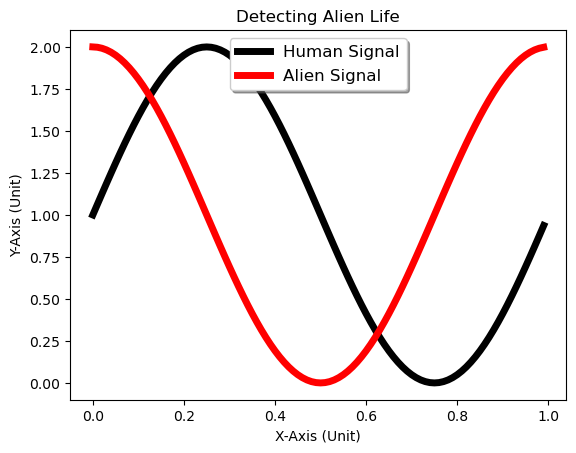

In [22]:
plt.plot(x_data, y_data_human, color='black',
         linewidth=5, linestyle='solid', label='Human Signal')

plt.plot(x_data, y_data_alien, color='red',
         linewidth=5, linestyle='solid', label='Alien Signal')

legend = plt.legend(loc='upper center', fontsize='large', shadow=True)

plt.xlabel(xlabel='X-Axis (Unit)')
plt.ylabel(ylabel='Y-Axis (Unit)')

plt.title(label='Detecting Alien Life')

plt.show()

## Adavanced Formatting Issues
1. tick label `rotation` = 'vertical' or 'horizontal'
2. `labelpad` = n pts (space between tick labels and axis label)
3. tickmark `width` and `length` (via `tick_params`)
4. axes `linewidth` (via runtime configuration (`rc`))
5. `fontsize` = n pts
6. `fontstyle` = 'normal', 'italic' or 'oblique'
7. `fontweight` = 'normal', 'bold', 'heavy' or 'light'

### Reset plotting defaults
- rc: config parameters for matplotliib

In [23]:
## new idea: reset the defaults
plt.rcdefaults()

In [ ]:
## Sometimes you might need to clear matplotlib's cache to obtain the correct font.

# import matplotlib.font_manager
# matplotlib.font_manager._load_fontmanager(try_read_cache=False)

In [ ]:
## new idea: axes linewidth
plt.rc('axes', linewidth=5)

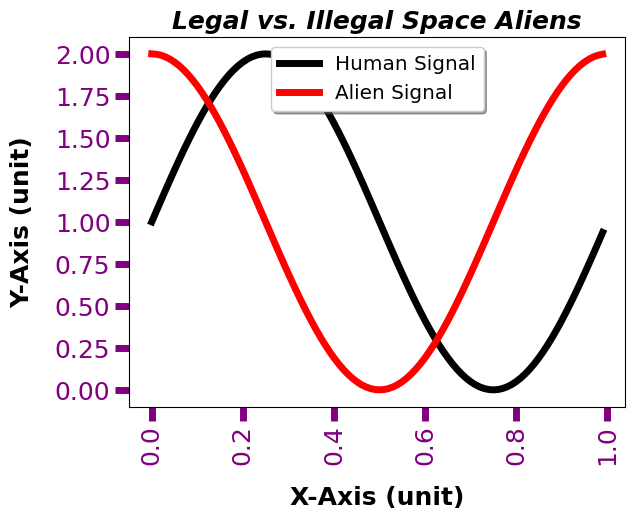

In [24]:
plt.plot(x_data, y_data_human, color='black',
         linewidth=5, linestyle='solid', label='Human Signal')

plt.plot(x_data, y_data_alien, color='red',
         linewidth=5, linestyle='solid', label='Alien Signal')

plt.legend(loc='upper center', shadow=True, fontsize='x-large', frameon=True)

## new idea: rotation
plt.xticks(rotation='vertical', fontsize=18)
plt.yticks(rotation='horizontal', fontsize=18)

## new idea: labelpad
plt.xlabel(xlabel='X-Axis (unit)', fontsize=18, fontweight='bold', labelpad=15)
plt.ylabel(ylabel='Y-Axis (unit)', fontsize=18, fontweight='bold', labelpad=15)

## new idea: title fontsize, fontstyle, fontweight
plt.title(label='Legal vs. Illegal Space Aliens',
          fontsize=18, fontstyle='italic', fontweight='bold')

## new idea: major tick marks' length, width and color
plt.tick_params(which='major', length=10, width=5, colors='purple')

plt.show()


## Controlling major tick mark range and minor ticks

In [ ]:
## new idea: minor ticks
from matplotlib.ticker import AutoMinorLocator

plt.rcdefaults()
plt.rc('axes', linewidth=2)

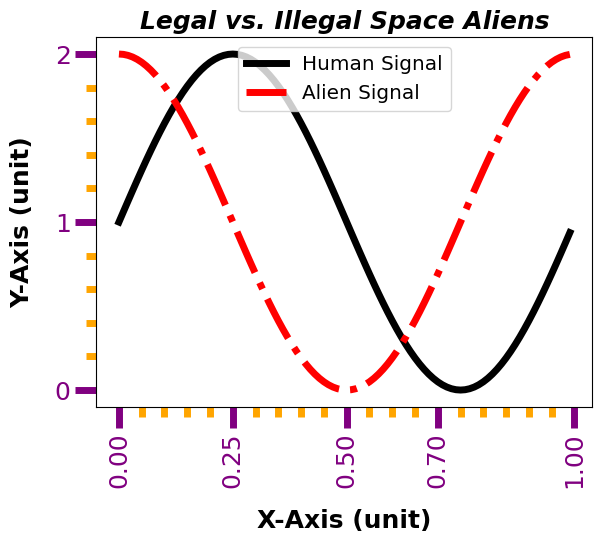

In [25]:
plt.plot(x_data, y_data_human, color='black',
         linewidth=5, linestyle='solid', label='Human Signal')

plt.plot(x_data, y_data_alien, color='red',
         linewidth=5, linestyle='dashdot', label='Alien Signal')

plt.legend(loc='upper center', shadow=False, fontsize='x-large', frameon=True)

plt.xlabel(xlabel='X-Axis (unit)', fontsize=18, fontweight='bold', labelpad=15)
plt.ylabel(ylabel='Y-Axis (unit)', fontsize=18, fontweight='bold', labelpad=15)

plt.title(label='Legal vs. Illegal Space Aliens',
          fontsize=18, fontstyle='italic', fontweight='bold')

## new ideas: tick range
##     must use NumPy since the axis values are floats
##     the "+ 1" is needed to print the "2" major tick mark
my_y_range = np.arange(min(y_data_human), max(y_data_human)+1, 1.0)

plt.yticks(my_y_range, fontsize=18)

## new ideas: or using Numpy Directly
plt.xticks(np.array([0.0, 0.25, 0.5, 0.7, 1.0]), rotation='vertical', fontsize=18)

## new ideas: major AND minor tick control
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', direction='out')

plt.tick_params(which='both', width=5)

plt.tick_params(which='major', length=15, colors='purple')
plt.tick_params(which='minor', length=7.5, color='orange')

plt.show()

## Fine control of how the data points and lines overlap

- `zorder`: https://matplotlib.org/stable/gallery/misc/zorder_demo.html

Now and concerning the above graph, let's switch the line that is in the foreground.
- orange line on top of the blue line

In [26]:
plt.rcdefaults()

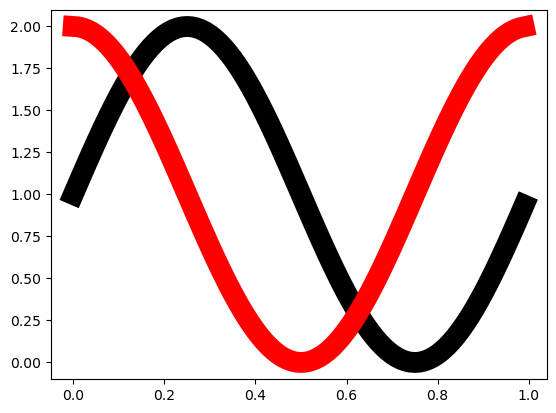

In [27]:
plt.plot(x_data, y_data_human, label='Human Signal', linewidth=15, color='black', zorder=1)
plt.plot(x_data, y_data_alien, label='Alien Signal', linewidth=15, color='red', zorder=2)

plt.show()

- blue line on top of the orange line

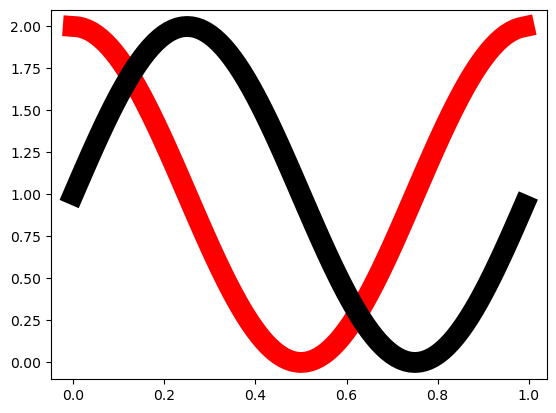

In [28]:
plt.plot(x_data, y_data_human, label='Human Signal', linewidth=15, color='black', zorder=2)
plt.plot(x_data, y_data_alien, label='Alien Signal', linewidth=15, color='red', zorder=1)

plt.show()

## Predefined styles

- https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [29]:
plt.style.available[:]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

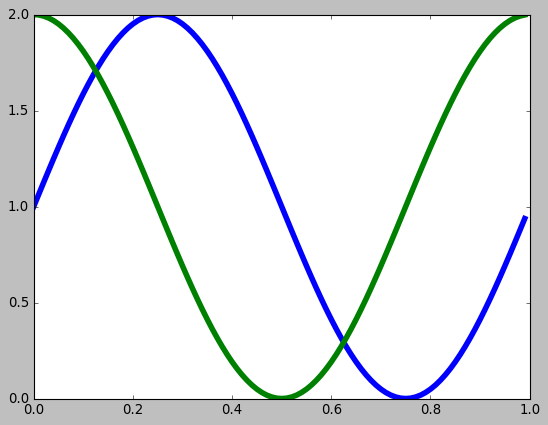

In [32]:
plt.style.use('classic')

plt.plot(x_data, y_data_human, label='Human Signal', linewidth=5)
plt.plot(x_data, y_data_alien, label='Alien Signal', linewidth=5)

plt.show()

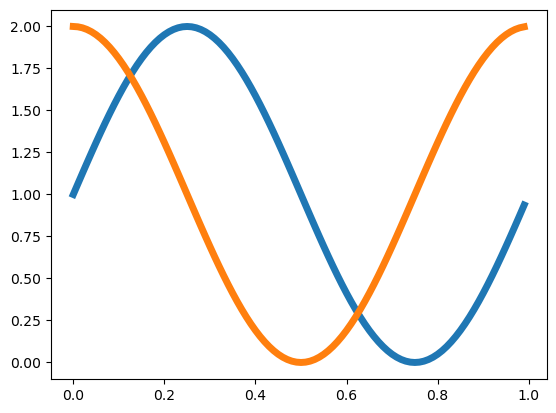

In [33]:
## new idea: reset the style to default
plt.style.use('default')

plt.plot(x_data, y_data_human, label='Human Signal', linewidth=5)
plt.plot(x_data, y_data_alien, label='Alien Signal', linewidth=5)

plt.show()

<hr style="border:2px solid gray"></hr>

## Bar plot

`matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar

`x` : sequence of scalars -- the x coordinates of the bars (see also align for the alignment of the bars to the coordinates.)

`height` : scalar or sequence of scalars -- The height(s) of the bars.

`width` : scalar or array-like, optional -- The width(s) of the bars (default: 0.8).
<br><br>

**Example**: Let's create a bar plot that does the following:
- shows the mean value of some fake experimental and simulated data
- shows the standard deviation of those data

In [34]:
time = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0,
        4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5,
        9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5,
        13.0, 13.5]

exp = [0.1185, 0.6524, 0.1291, 0.9445, 0.0272, 0.7598, 0.8159, 0.8003,
       0.5716, 0.6651, 0.9983, 0.1004, 0.8433, 0.0067, 0.8238, 0.3952,
       0.6452, 0.848, 0.1986, 0.9114, 0.7693, 0.5009, 0.211, 0.9227,
       0.0461, 0.2177, 0.9554, 0.613]

sim = [0.2255, 0.3052, 0.0744, 0.7611, 0.1183, 0.045, 0.2669, 0.177,
       0.2433, 0.2302, 0.0772, 0.0805, 0.6214, 0.1156, 0.1607, 0.042,
       0.1123, 0.383, 0.5566, 0.667, 0.5655, 0.4875, 0.0104, 0.4968,
       0.2639, 0.2197, 0.944, 0.2423]

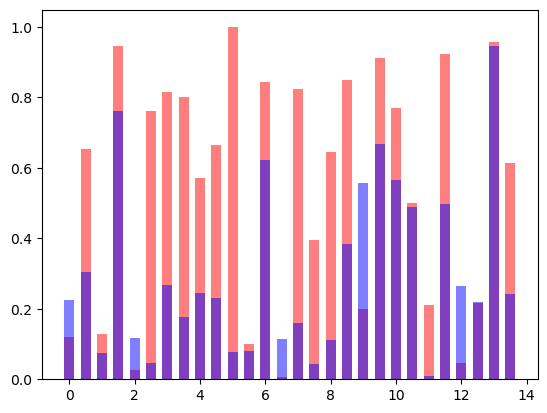

In [35]:
plt.bar(x=time, height=exp, color='red', alpha=0.5, width=0.3, label='Experimental')
plt.bar(x=time, height=sim, color='blue', alpha=0.5, width=0.3, label='Simulated')

## overlap colors will be red + blue = violet

plt.show()

##### Customized x-tick labels and bar coloring

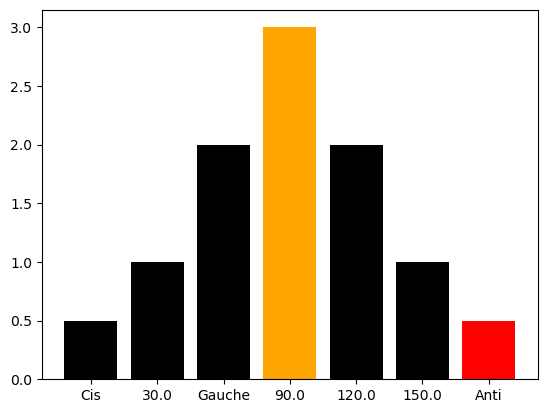

In [36]:
x_axis = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
y_axis = [0.5, 1.0, 2.0, 3.0, 2.0, 1.0, 0.5]

plt.bar(x=x_axis, height=y_axis, color=['black', 'black', 'black',
                                        'orange', 'black', 'black',
                                        'red'])

bars_labels = ['Cis', '30.0', 'Gauche', '90.0', '120.0', '150.0', 'Anti']

plt.xticks(ticks=x_axis, labels=bars_labels)

plt.show()

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Extra Information


### A more complex example a bar graph
The following bar graph displays the "exp" and "sim" data
- the mean, and
- the standard deviation

In [ ]:
exp_average = np.mean(exp)
sim_average = np.mean(sim)

# sample standard deviation via ddof=1 (i.e. this reproduces libreoffice stdev)
exp_std = np.std(exp, ddof=1)
sim_std = np.std(sim, ddof=1)

print(f'Experimental Average: {exp_average:0.2f}')
print(f'Simulated Average: {sim_average:0.2f}\n')
print(f'Experimental Standard Deviation: {exp_std:0.2f}')
print(f'Simulated Standard Deviation: {sim_std:0.2f}')

<div class="alert alert-block alert-warning">

**Note**
- Standard deviation will be implemented via `yerr` (error values that correspond to the y data)
- Format control over the `yerr` (error is done using `error_kw` (a dictionary that controls the error bar of the bar plot)

In [ ]:
## Setup to show 1 bar graph within each category (i.e. 1 in exp. & 1 in sim.)
##   (change to 2, 3 or 4 to see what happens)
n_groups = 1
index = np.arange(n_groups)

bar_width = 0.3

rects1 = plt.bar(x=index, height=exp_average, width=bar_width,
                 color='red', alpha=0.5, label='Experimental',           
                 yerr=exp_std,
                 error_kw={'ecolor': 'darkred', 'alpha':0.2, 'elinewidth':4})

## to place this bar next to the above one: index+bar_width
rects2 = plt.bar(x=(index+bar_width), height=sim_average, width=bar_width,
                 color='blue', alpha=0.5, label='Simulated',
                 yerr=sim_std,
                 error_kw={'ecolor': 'darkblue', 'alpha':0.8, 'elinewidth':8})

plt.xlabel(xlabel='Methodology')
plt.ylabel(ylabel='Values')
plt.title(label='Experimental and Simulated Results')

plt.tick_params(axis='x',          ## changes apply only to the x-axis (option: x, y, both)
                which='both',      ## both major and minor ticks (major, minor, both)
                bottom=False,      ## ticks along the bottom edge are off
                top=False,         ## ticks along the top edge are off
                labelbottom=False) ## labels along the bottom edge are off

plt.legend()
plt.grid(False)

plt.show()

<div class="alert alert-block alert-warning">

<hr style="border:1.5px dashed gray"></hr>

## Subplots - multiple plots in a single plot

- `subplot(nrows, ncols, index)`

    - `index`: position within the overall plot

<br>

- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


### Create functions for repetitive plotting


For simplicity, let's define some functions
- reuse them for other, but similar data
- a single location that we can easily alter and debug

In this case, we will **define functions** that will **simplify our code** such that we can **focus upon** the idea of **subplots**.

<!-- For fun the plot_bar will mimic XKCD comics
- has developed cartoon-style plots
- https://xkcd.com/1319 -->

In [37]:
def plot_line():
    plt.style.use('fivethirtyeight')

    x_data = np.arange(1, 11, 1)
    y_data = np.random.randn(len(x_data))

    plt.plot(x_data, y_data, linewidth=5, color='orange', linestyle='-', label='Experimental')

    plt.xlabel(xlabel='X-Axis (Unit)', fontsize=18, fontweight='bold')
    plt.ylabel(ylabel='Y-Axis (Unit)', fontsize=18, fontweight='bold')

    plt.yticks(fontsize=14)
    plt.xticks(x_data, rotation='vertical', fontsize=14)

    plt.title(label='Experimental Results', fontsize=18, fontweight='bold')

    plt.legend()


def plot_scatter():
    plt.style.use('fivethirtyeight')

    plt.scatter([1, 2, 3, 4, 7], [1, 4, 9, 16, 49],
                linewidth=5, alpha=0.5, s=500, marker='s', label='Tests')


def plot_bar():
    plt.style.use('fivethirtyeight')

    x_data = np.arange(1, 2, 1)

    rects1 = plt.bar(x=x_data,
                     height=np.random.randn(len(x_data)),
                     width=0.3, color='red', alpha=0.4, label='Experimental')

    rects2 = plt.bar(x=x_data + 0.3,
                     height=np.random.randn(len(x_data)),
                     width=0.3, color='blue', alpha=0.4, label='Simulated')

    plt.xlabel(xlabel='Methodology')
    plt.ylabel(ylabel='Values')
    plt.title(label='Results by Methodology')

    plt.tick_params(axis='x', which='both', bottom=False, top=False, 
                    labelbottom=False)
    plt.legend()

**Example 1**: Plot <font color='DodgerBlue'>one figure</font>, but with <font color='DodgerBlue'>two subfigures</font>
- 1 column
- 2 rows

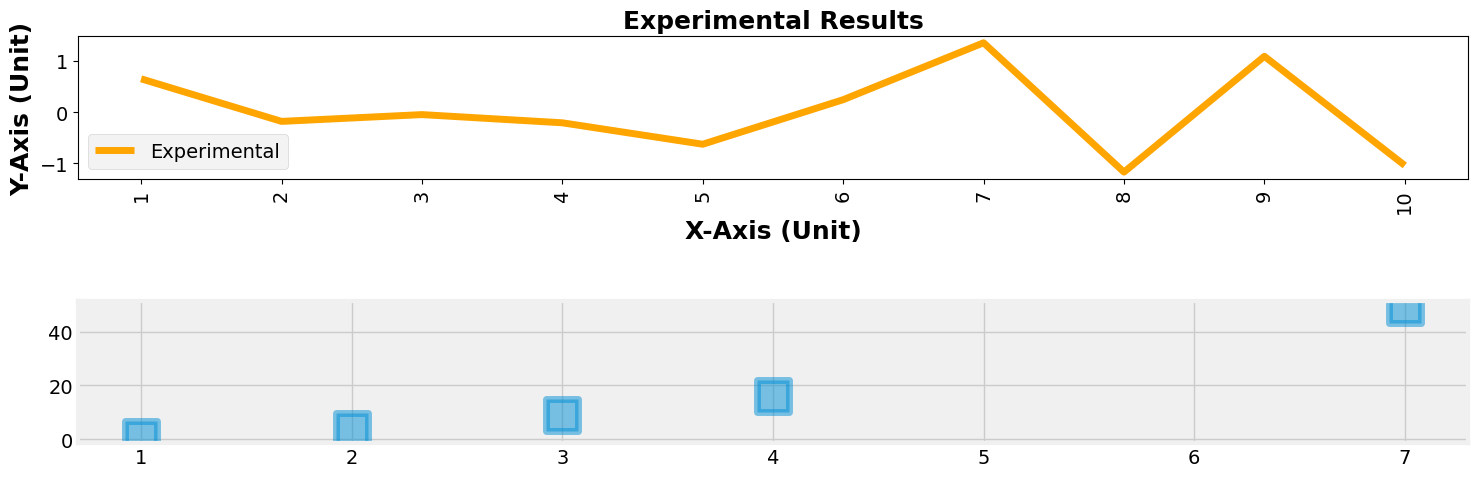

In [38]:
## needed for the plot
plt.figure(figsize=(15, 5))

## plt.subplot(2 rows, 1 column, 1st subplot position)
plt.subplot(2, 1, 1)
plot_line()

## plt.subplot(2 rows x 1 column, 2nd subplot position)
plt.subplot(2, 1, 2)
plot_scatter()

## adds an extra height padding between the plots
plt.tight_layout(h_pad=3.0)
plt.show()

**Example 2**: Plot <font color='DodgerBlue'>one figure</font>, but with <font color='DodgerBlue'>three subfigures</font>
- **two graphs stacked** to the **left**, and
- **one graph** placed to the **right** that **spans** the height of the **two left graphs**


- 2 columns
- 2 rows

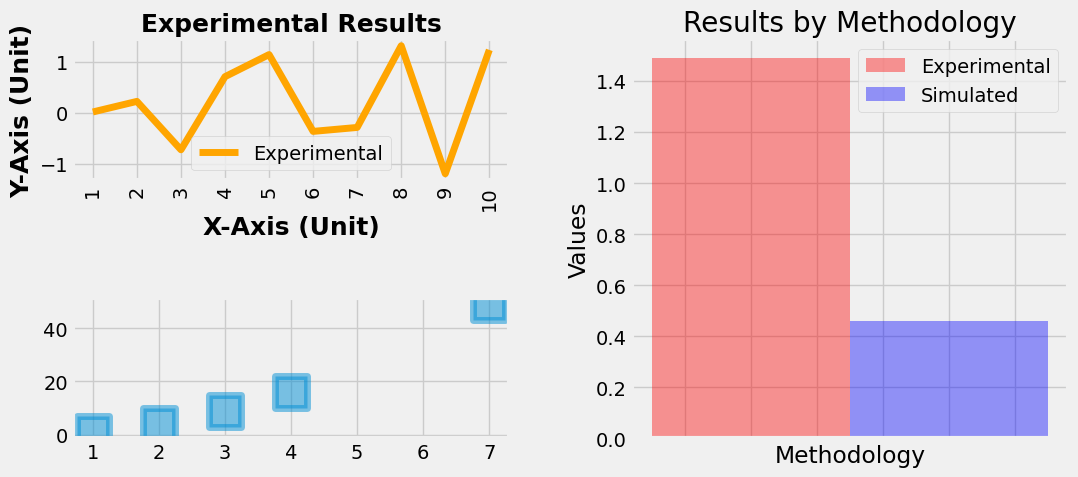

In [39]:
plt.figure(figsize=(11, 5))

## plt.subplot(2 rows, 2 columns, 1st subplot position) (i.e., top, left position)
plt.subplot(2, 2, 1)
plot_line()

## plt.subplot(1 row, 2 columns, 2nd subplot position) (i.e., top + bottom, right position)
## right position
plt.subplot(1, 2, 2)
plot_bar()

## plt.subplot(2 rows, 2 columns, 3rd subplot position) (i.e., bottom, left position)
plt.subplot(2, 2, 3)
plot_scatter()

plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.show()

Reset defaults values (i.e., not `fivethirtyeight`) via the runtime configuration defaults function

In [40]:
plt.rcdefaults()

## Final Example

- Defining objects for the plots (using the nomenclature often seen online: e.g., **`ax`**)


- Bonus: learn about **Cumulative or Running Sum** (e.g., cumulative profit)
    - a sum that is updated sequentially as you move along a list of numbers
        - [a, b, c, ...] $\rightarrow$ [NaN , a+b, a+b+c]
        
#### Cumulative example

<font color='DodgerBlue'>Pandas' function</font> `cumsum`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html

In [41]:
example_data = np.arange(1, 11, 1)
display(example_data)

example_data.cumsum()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

<font color='DodgerBlue'>NumPy's function</font> `cumsum`: https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

In [42]:
np.cumsum(a=example_data)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

Make some random new data that will be interesting:

In [43]:
x_data = np.random.randn(100)
y_data = np.random.randn(100)

**Example 3**: Plot <font color='DodgerBlue'>one figure</font>, but with <font color='DodgerBlue'>three subfigures</font>

- **three graphs** place in a **2x2** grid/matrix
    - 2 rows by 2 columns grid

<br>

1. Create **three matplotlib.pyplot objects** (`ax1`, `ax2`, and `ax3`)
    - Allows for individual control

<br>

2. Plot **three graphs** (a <font color='DodgerBlue'>scatter</font>, a <font color='DodgerBlue'>cumulative sum line</font>, and a <font color='DodgerBlue'>histogram</font>)

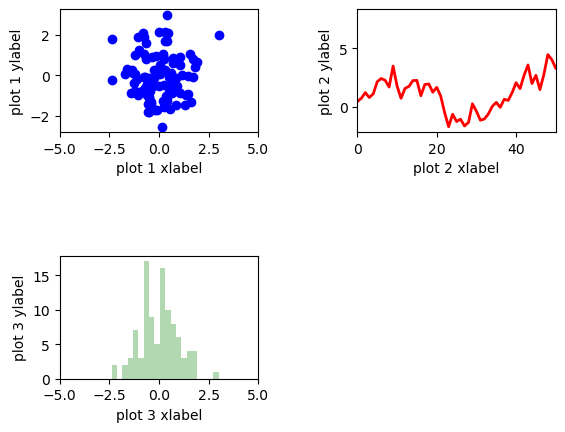

In [44]:
fig = plt.figure()

fig.subplots_adjust(wspace=0.5, hspace=1.0)

## 2x2 grid for plots (i.e., 2 rows, 2 columns, n position)
ax1 = fig.add_subplot(2, 2, 1) ## 1st plot - will be a scatter
ax2 = fig.add_subplot(2, 2, 2) ## 2nd plot - will be a line; change to (1, 2, 2) for spanning two rows
ax3 = fig.add_subplot(2, 2, 3) ## 3rd plot - will be a histogram

ax1.set_xlabel(xlabel='plot 1 xlabel')
ax1.set_ylabel(ylabel='plot 1 ylabel')
ax1.set_xlim(-5, 5)

ax2.set_xlabel(xlabel='plot 2 xlabel')
ax2.set_ylabel(ylabel='plot 2 ylabel')
ax2.set_xlim(0, 50)

ax3.set_xlabel(xlabel='plot 3 xlabel')
ax3.set_ylabel(ylabel='plot 3 ylabel')
ax3.set_xlim(-5, 5)

ax1.scatter(x_data, y_data, color='blue')
ax2.plot(x_data.cumsum(), color='red', linewidth=2, linestyle='solid')
ax3.hist(x_data, bins=20, color='green', alpha=0.3)

plt.show()